In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/employee_burnout_analysis-AI.xlsx')

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

# Exploratory Data Analysis

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

Text(0.5, 1.0, 'Resource Allocation')

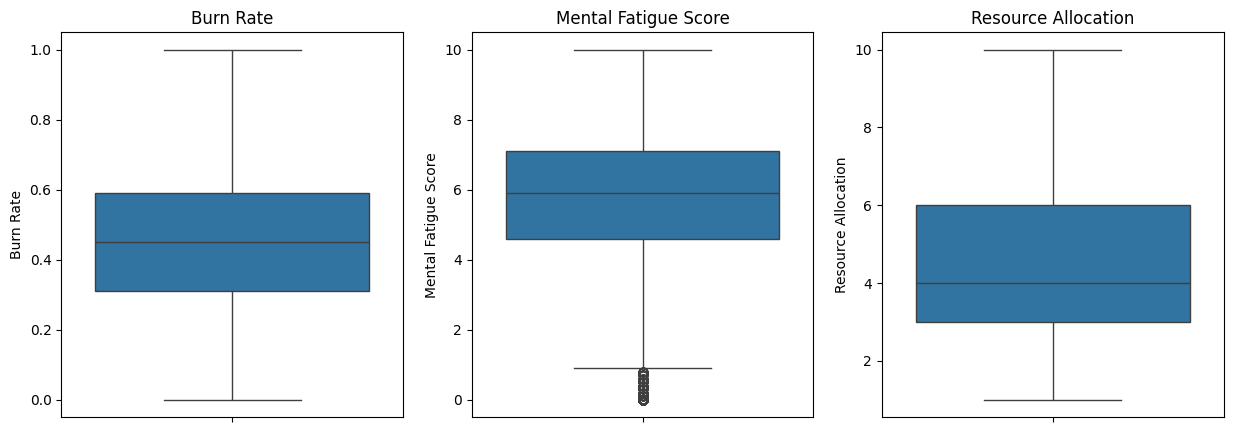

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data['Burn Rate'],ax=ax[0])
ax[0].set_title('Burn Rate')
sns.boxplot(data['Mental Fatigue Score'],ax=ax[1])
ax[1].set_title('Mental Fatigue Score')
sns.boxplot(data['Resource Allocation'],ax=ax[2])
ax[2].set_title('Resource Allocation')

Text(0.5, 1.0, 'Resource Allocation')

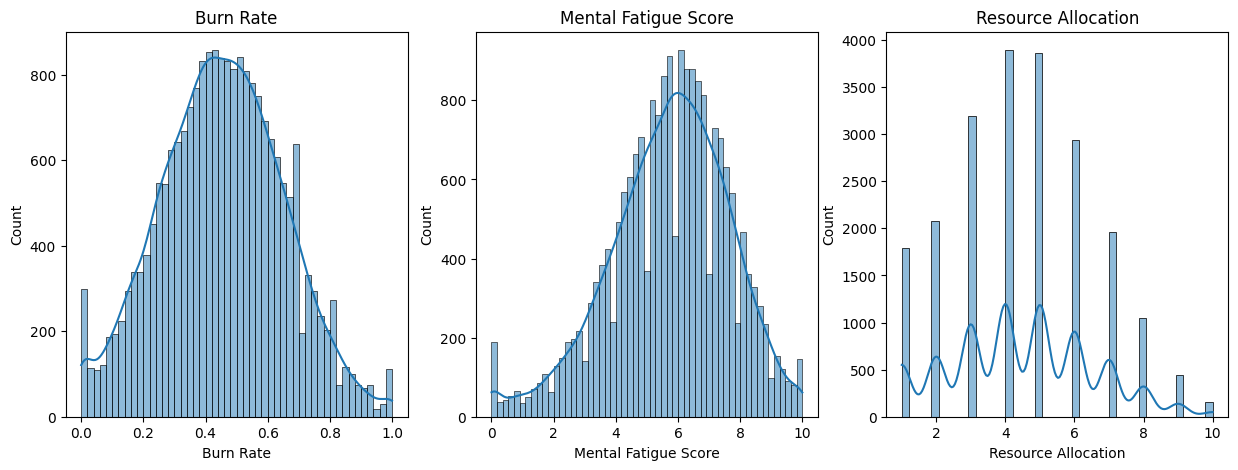

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Burn Rate'], kde=True,ax=ax[0])
ax[0].set_title('Burn Rate')
sns.histplot(data['Mental Fatigue Score'], kde=True,ax=ax[1])
ax[1].set_title('Mental Fatigue Score')
sns.histplot(data['Resource Allocation'], kde=True,ax=ax[2])
ax[2].set_title('Resource Allocation')

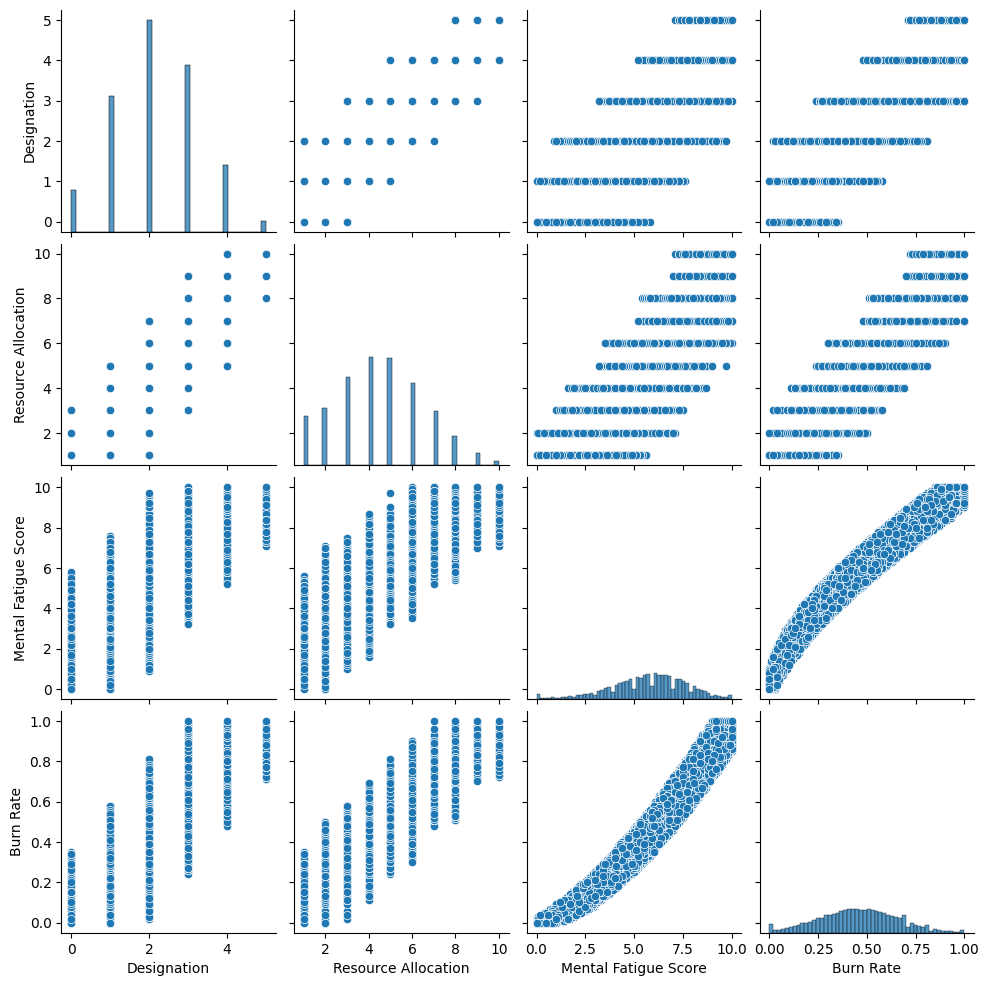

In [ ]:
sns.pairplot(data)
plt.show()

Min date: 2008-01-01 00:00:00
Max date: 2008-12-31 00:00:00


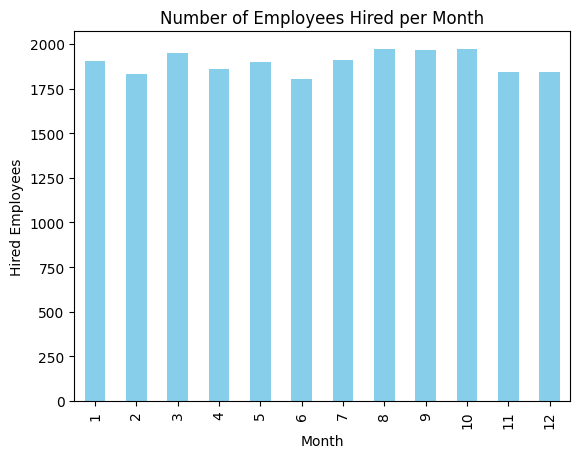

In [ ]:
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'], format='%Y-%m-%d')

print(f"Min date: {data['Date of Joining'].min()}")
print(f"Max date: {data['Date of Joining'].max()}")

data_month = data.copy()

data_month['Date of Joining'] = pd.to_datetime(data_month['Date of Joining'])

monthly_counts = data_month['Date of Joining'].groupby(data_month['Date of Joining'].dt.month).count()
monthly_counts.plot(kind='bar', xlabel='Month', ylabel='Hired Employees', title='Number of Employees Hired per Month',color='skyblue')
plt.show()

In [ ]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
2         69
3        307
4        205
        ... 
22745    364
22746     18
22747    309
22748      9
22749      5
Name: Days, Length: 22750, dtype: int64

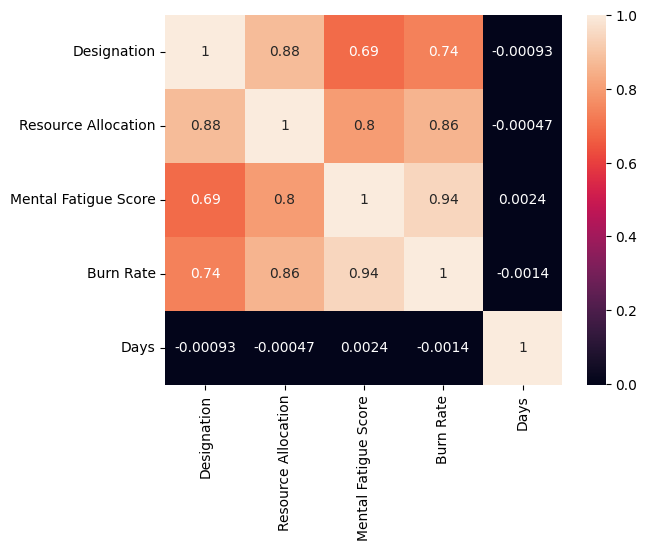

In [ ]:
corr_data=data.select_dtypes(include=['number'])
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data=data.drop(['Employee ID'],axis=1)
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
data.head()
encoded_columns = data.columns


In [ ]:
data.isnull().sum()

Date of Joining            0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate                  0
Days                       0
Company Type_Service       0
WFH Setup Available_Yes    0
Gender_Male                0
dtype: int64

In [ ]:
data.head()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2008-09-30,2,3.0,3.8,0.16,273,True,False,False
1,2008-11-30,1,2.0,5.0,0.36,334,True,True,True
3,2008-11-03,1,1.0,2.6,0.20,307,True,True,True
4,2008-07-24,3,7.0,6.9,0.52,205,True,False,False
5,2008-11-26,2,4.0,3.6,0.29,330,False,True,True


In [ ]:
scaler=StandardScaler()
data['Mental Fatigue Score']=scaler.fit_transform(data[['Mental Fatigue Score']])

In [ ]:
y=data['Burn Rate']
X=data.drop(['Burn Rate','Date of Joining'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import os
import pickle

#saving the processed data
path = '../data/processed/'

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)

# Model Building

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0030645554236291323
Root Mean Squared Error: 0.05535842685291131
Mean Absolute Error: 0.04552602558620345
R-squared Score: 0.9202038154359505
